# Part II - (Ford GoBike System Data Analysis)
## by (Ireyemi Stephen)

## Investigation Overview

In this investigation I looked other feautures of the dataset is related to bike-trip duration.The main focus on start_hourofday, start_dayofweek and duration_minutes.
 
 

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains 183412 observations with 16 associated variables. 10140 data points were removed from the analysis due to inconsistencies or missing information then my dataset structure became 173272 observations with 17 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# to drop missing values 
bikes.dropna(inplace=True)

In [4]:
# convert start_time and end_time to datetime datatype
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)

# convert start_station_id, end_station_id, and bike_id to string datatype
bikes.start_station_id = bikes.start_station_id.astype('str')
bikes.end_station_id = bikes.end_station_id.astype('str')
bikes.bike_id = bikes.bike_id.astype('str')

# convert user_type and member_gender to category datatype
bikes.user_type = bikes.user_type.astype('category')
bikes.member_gender = bikes.member_gender.astype('category')
bikes.bike_share_for_all_trip = bikes.bike_share_for_all_trip.astype('category')


In [5]:
# getting the age of the members from 'member_birth_year'  and convert it to integer 

bikes['member_age'] = 2022 - bikes['member_birth_year']
bikes['member_age'] = bikes['member_age'].astype(int)
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63


In [6]:
# converting member_birth_year to integer datatype

bikes.member_birth_year = bikes.member_birth_year.astype(int)

In [7]:
# to keep only events where riders are under 67 years of age
bikes = bikes.query('member_age <= 67')

In [8]:
# to drop unnecessary columns 
bikes.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude', 'member_birth_year'], axis=1, inplace=True)

In [9]:
# to add new columns for trip duration in minute, hour of the day, day of week and month

bikes['duration_minute'] = bikes['duration_sec']/60
bikes['start_date'] = bikes.start_time.dt.strftime('%d-%m-%Y')
bikes['start_hourofday'] = bikes.start_time.dt.strftime('%H')
bikes['start_dayofweek'] = bikes.start_time.dt.strftime('%A')
bikes['start_month'] = bikes.start_time.dt.strftime('%B')

bikes.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_gender                    category
bike_share_for_all_trip          category
member_age                          int64
duration_minute                   float64
start_date                         object
start_hourofday                    object
start_dayofweek                    object
start_month                        object
dtype: object

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Distribution of Bike-trip Duration

This is the time taken(in minutes) to ride a bike by FordGo Bike user. Most bike-trips were less than 30 minutes. After a deeper investigation, it is observed that more than 96% of trips took less than 30 minutes and only 0.79% of trips are of duration more than 1hr.


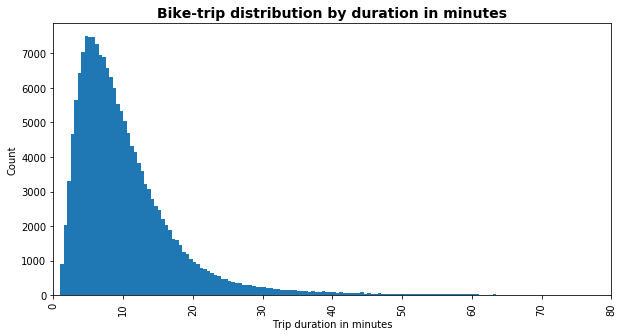

In [10]:
# trip distribution by duration
plt.figure(figsize = (10, 5))
bins = np.arange(0, bikes['member_age'].max()+0.5, 0.5)


color = sb.color_palette()[0]
plt.hist(data=bikes, x='duration_minute', color= color, bins = bins)
plt.xticks(rotation=90)
plt.xlim(0, 80)
plt.xlabel('Trip duration in minutes')
plt.ylabel('Count')
plt.title("Bike-trip distribution by duration in minutes", fontsize=14, fontweight='bold')
plt.show()

##  Distribution of Start weekday?

Start weekday is the day the bikers begin their ride in the week. Most rides were done on Thursdays while the weekends(Saturday and Sunday has the least count of trips taken).

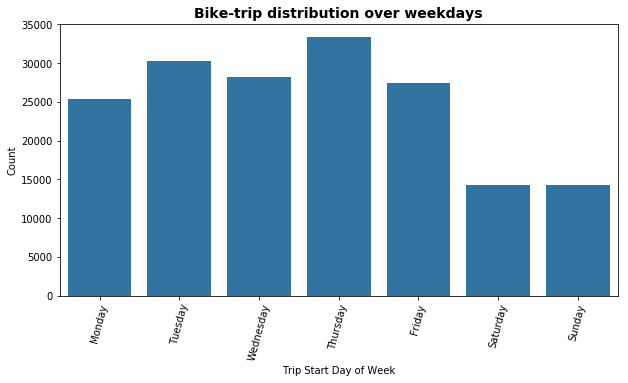

In [11]:
# bike-trip distribution over weekday
plt.figure(figsize = (10,5))

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_category = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bikes['start_dayofweek'] = bikes['start_dayofweek'].astype(weekday_category)
color = sb.color_palette()[0]

sb.countplot(data=bikes, x='start_dayofweek', color= color)
plt.xlabel('Trip Start Day of Week')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.title("Bike-trip distribution over weekdays", fontsize=14, fontweight='bold')

plt.show()

##  Distribution of Start Hour of Day

This is the hour of the day in when users begin their ride. It has two highest peak times : 8am and 5pm. This should be due to the fact that people leave their homes and head back home at those peak hours.

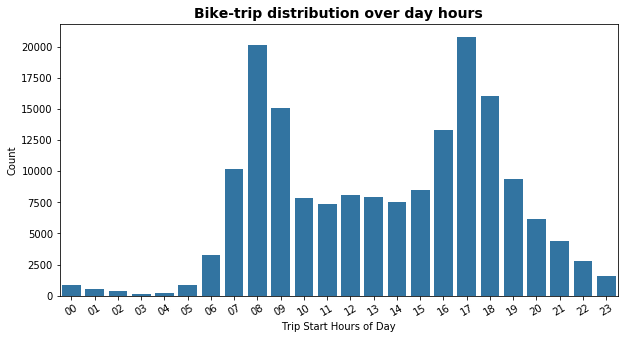

In [12]:
# bike-trip distribution over day hours
plt.figure(figsize = (10,5))

hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_category = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
bikes['start_hourofday'] = bikes['start_hourofday'].astype(hour_category)
color = sb.color_palette()[0]

sb.countplot(data = bikes, x = "start_hourofday", color = color)
plt.title('Bike-trip distribution over day hours' , fontsize=14, fontweight='bold')
plt.xlabel('Trip Start Hours of Day')
plt.ylabel('Count')
plt.xticks(rotation = 30)
plt.show()

## Distribution of Bike user-type

This shows the distribution of the two user of FordGo Bike system in count and in percentage. It can be concluded that most bike users are Subscribers with 95.5% .

Subscriber    90.487788
Customer       9.512212
Name: user_type, dtype: float64


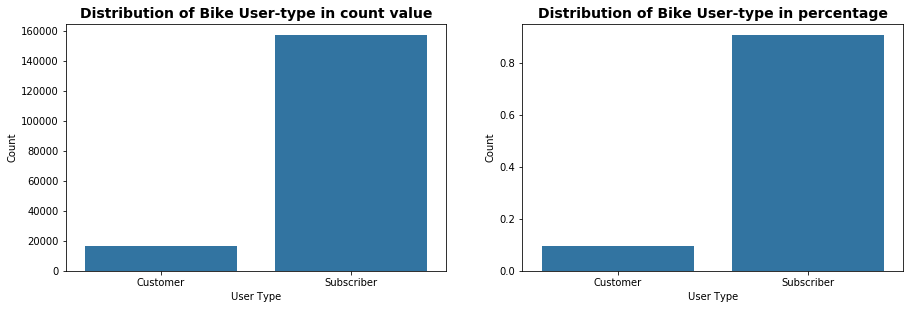

In [13]:
#to find the bike user-type by count
plt.figure(figsize = [15, 10]) 
color = sb.color_palette()[0]

plt.subplot(2, 2, 1)
plot = sb.countplot(data=bikes, x='user_type', color= color)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title("Distribution of Bike User-type in count value" , fontsize=14, fontweight='bold')


#to find the bike user-type in percent
plt.subplot(2, 2, 2)
counts = bikes['user_type'].value_counts(normalize = True)
sb.barplot(x = counts.index, y = counts.values, color=color)
plt.xlabel('User Type')
plt.ylabel('Count')
print(counts * 100)
plt.title("Distribution of Bike User-type in percentage" , fontsize=14, fontweight='bold');


## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## User-type vs Bike-trip Duration

Despite that fact that we have more subscribers than customers, Customers have the longest bike-trip duration.

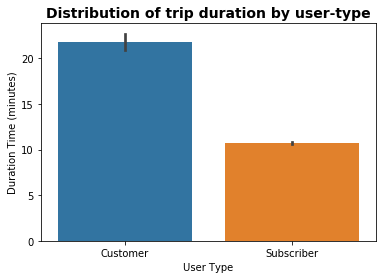

In [14]:
# plotting relation between user type and trip time
user_count = bikes.user_type.value_counts().index

sb.barplot(y='duration_minute' , x='user_type' ,data=bikes );
plt.xlabel('User Type')
plt.ylabel('Duration Time (minutes)');
plt.title("Distribution of trip duration by user-type", fontsize=14, fontweight='bold' );

##  User-type vs Start weekday

Using the count method, subscribers rode more bikes than customers for everyday in the week but as seen by the previous slide customers have longer duration of bike trips.

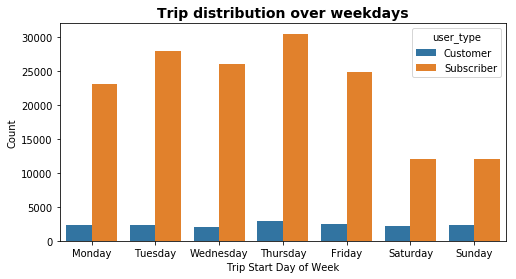

In [15]:
#plotting relation between Trip Start Day of Week and user type 

plt.figure(figsize = (8,4))

sb.countplot(data=bikes, x='start_dayofweek', hue='user_type')
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays",fontsize=14, fontweight='bold' )

plt.show()

##  User-type vs Start Hour of Day

This shows the relationship between user type and start hour of day. This distribution is bimodal. It is observed from the distribution that at 2am till 4am customers did not ride bikes.

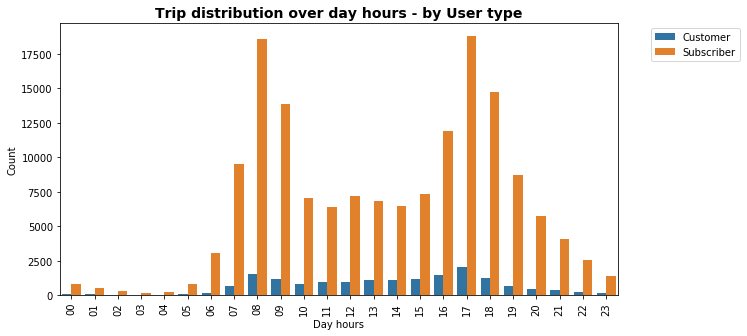

In [16]:
#plotting relation between Trip Start hour of the day and user type

plt.figure(figsize = (10,5))
sb.countplot(data = bikes, x = "start_hourofday", hue='user_type')

plt.xlabel('Day hours')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title("Trip distribution over day hours - by User type", fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');


## (Visualization 3)



## What is the trip duration over day of week by user type?

This measures the average time (in minutes) users spend riding bikes during the week categorically. It is observed in this distribution that users spend  more time riding bikes on weekend than weekdays. Bike-trips on weekends are almost 30minutes. During the working days, Monday has the highest duration of average bike use while Tuesdays have the least avergae bike time.



<function matplotlib.pyplot.show(*args, **kw)>

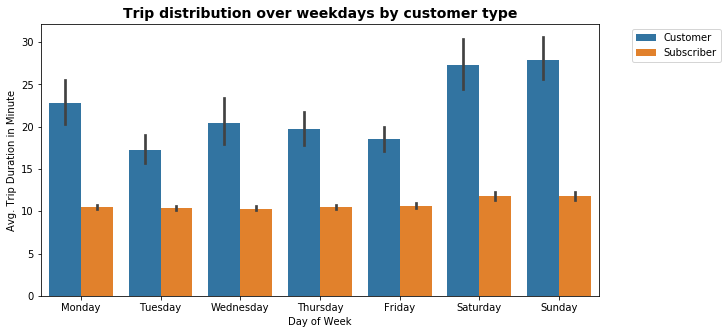

In [17]:
plt.figure(figsize = (10,5))

sb.barplot(data = bikes, x = "start_dayofweek", y = "duration_minute", hue='user_type')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Trip distribution over weekdays by customer type", fontsize=14, fontweight='bold')

plt.show

## What is the trip duration over hour of day by user type?

From observation, some customers ride bikes the longest at 3am which is really unusually.

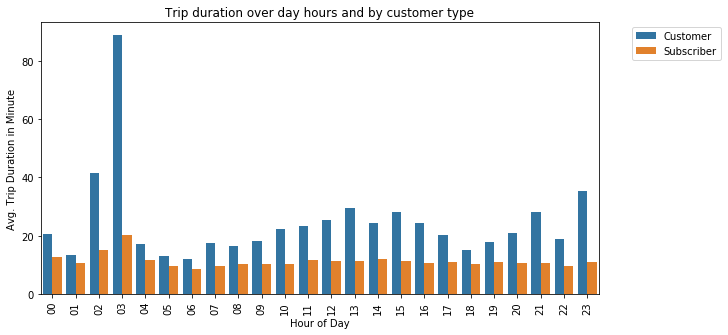

In [18]:
plt.figure(figsize = (10,5))

sb.barplot(data = bikes, x = "start_hourofday", y = "duration_minute",   hue='user_type', ci = None)
plt.title("Trip duration over day hours and by customer type")
plt.xlabel('Hour of Day')
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## What is the relationship between trip week day and hour of day by user type?

This shows a deep relationship between hour of day of trips, week day of trips and user type.

From the subscribers heatplot,
highest number of subscribers are on Tuesday 8am and Thursday 8am & 5pm having an average of 4000 subscribers.
It is obvious that subscribers use bikes everyday of the week at every hour of the day.

From the customers heatplot,
Thursday 5pm has the highest bike usage.
There are days when customers did not use bikes at some givens hours. This is obvious on Monday and Tuesday 3am and Wednesday 2am.

Comparing both heatplots; it is seen that at mid-hours of the day subscribers did not use bikes as the customers compared to their distribution respectively.

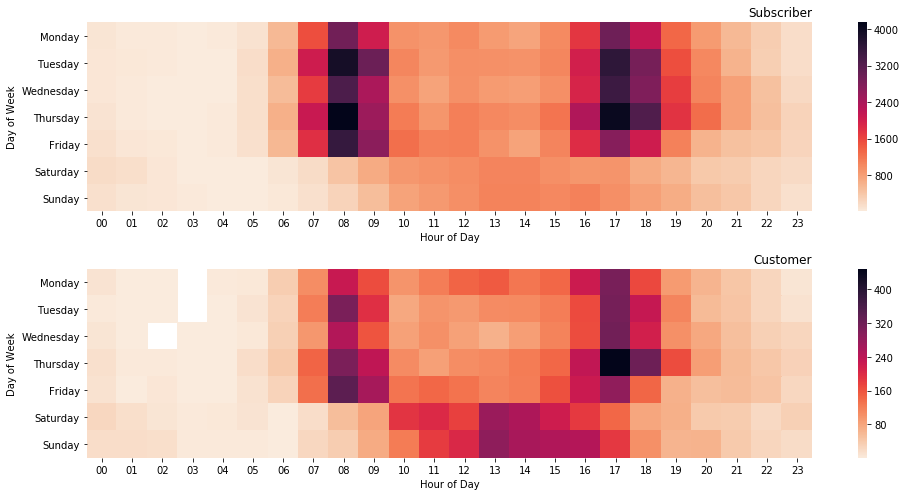

In [19]:
plt.figure(figsize = (14,7))

plt.subplot(2, 1, 1)
customers = bikes[bikes['user_type'] == "Subscriber"] 
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
customers = bikes[bikes['user_type'] == "Customer"] 
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.tight_layout()

## THANK YOU!

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 490206 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
